## Baseline Modeling ##

The baseline models are:
- Ridge Regression
- SVM (Linear, Kernel)
- KNN
- Random Forest
- Grandient Boosting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# import warnings 
# warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

### Prepare data ###

In [3]:
df = pd.read_csv('../../data/data_clean/SASS_cleaned_v2.csv', sep=',', header=0)
print(df.shape)

(3640, 57)


In [4]:
cols_ren = {'label_Current_Teacher': 'label_Current',
'vacnc_difficult_STEM_Yes': 'vacnc_STEM',
'number_of_dependents': 'num_dependents',
'region_Northeast': 'region_Northeast',
'region_West': 'region_West',
'marital_status_Married': 'married',
'race_t_White': 'race_T_White',
'race_t_Black': 'race_T_Black',
'race_t_Hispanic': 'race_T_Hispanic',
'gender_t_Female': 'gender_T_Female',
'summer_teaching_Yes': 'summer_teaching',
'nonteaching_job_Yes': 'nonteaching_job',
'nonschool_job_Yes': 'nonschool_job',
'extracur_act_Yes': 'extracur_act',
'merit_pay_Yes': 'merit_pay',
'union_member_Yes': 'union_member',
'BA_major_code_STEM': 'BA_major_STEM',
'MA_major_code_STEM': 'MA_major_STEM',
'main_tch_fields_cert_type_Regular': 'field_cert_Regular',
'MA_deg_Yes': 'deg_T_MA',
'pd_time': 'pd_time',
'pd_finance': 'pd_finance',
'remain_in_teaching': 'remain_teaching',
'STEM_teaching_field': 'field_STEM',
'STEM_hours_taught': 'hrs_taught_STEM',
'public_ft_exp': 'public_ft_exp',
'public_pt_exp': 'public_pt_exp',
'private_ft_exp': 'private_ft_exp',
'class_org': 'class_org',
'main_teaching_lastyr_Same_as_thisyr': 'field_same',
'ft_pt_status_FT': 'full_time',
'teaches_ungraded_Yes': 'teaches_ungraded',
'teaches_7_to_12': 'teaches_7to12',
'new_teacher_Yes': 'new_teacher',
'percent_minority_students': 'minority_students',
'FRPL_eligible_k_12_students': 'FRPL_eligible_k12',
'student_teacher_ratio': 'stu_tch_ratio',
'sch_type': 'sch_type',
'level_Elementary': 'level_Elementary',
'urbanicity': 'urbanicity',
'title_I_receive_students_Yes': 'title_I_receive',
'age_p': 'age_P',
'salary': 'salary_P',
'yrs_princpl_this_sch': 'yrs_P_this_sch',
'yrs_princpl_oth_schls': 'yrs_P_oth_schls',
'yrs_tchng_before_princpl': 'yrs_tch_before_P',
'yrs_tchng_since_princpl': 'yrs_tch_since_P',
'deg_highest_P': 'deg_highest_P',
'race_p_Black': 'race_P_Black',
'race_p_White': 'race_P_White',
'race_p_Hispanic': 'race_P_Hispanic',
'gender_p_Female': 'gender_P_Female',
'incentives_pay': 'incen_pay',
'incentives_recruit_NonSTEM': 'incen_NonSTEM'}
 
df.rename(columns=cols_ren, inplace=True)

In [5]:
df3 = pd.read_csv('../../data/data_clean/SASS_cleaned_v3.csv', sep=',', header=0)
temp = [c for c in df.columns if c not in df3.columns]
temp

['class_org', 'teaches_ungraded']

Loading the Feature Selection result report

In [6]:
report = pd.read_csv('../../data/data_clean/Feature_Selection_2_Report.csv', sep=',', header=0)

In [7]:
report.sort_values(by=['Test Accuracy', 'MCC'], ascending=False).head(5)

,model,n Selected,type,Counts,Method,Train Accuracy,Test Accuracy,MCC,F1,features,index
60,Grandient Boosting,38,by methods,NaN,Regularization - Lasso,0.799107,0.774725,0.523722,0.769392,"['remain_teaching', 'public_pt_exp', 'public_f...",[[ 1]\n [ 3]\n [ 4]\n [ 6]\n [ 7]\n [ 9]\n [10...
53,Gradient Boosting,43,by counts,4.0,NaN,0.798764,0.769231,0.511779,0.764017,"['remain_teaching', 'public_pt_exp', 'public_f...",[[ 1]\n [ 2]\n [ 3]\n [ 4]\n [ 7]\n [ 9]\n [10...
54,Gradient Boosting,36,by counts,5.0,NaN,0.801511,0.767857,0.508765,0.762487,"['remain_teaching', 'public_pt_exp', 'public_f...",[[ 1]\n [ 2]\n [ 3]\n [ 4]\n [ 7]\n [ 9]\n [10...
52,Gradient Boosting,51,by counts,3.0,NaN,0.798420,0.766484,0.505873,0.761456,"['remain_teaching', 'public_pt_exp', 'public_f...",[[ 0]\n [ 1]\n [ 2]\n [ 3]\n [ 4]\n [ 7]\n [ 8...
62,Grandient Boosting,28,by methods,NaN,Permutation Importance - Random Forest,0.790522,0.766484,0.505873,0.761456,"['remain_teaching', 'public_pt_exp', 'public_f...",[[ 1]\n [ 2]\n [ 3]\n [ 7]\n [ 9]\n [10]\n [11...


**Split data**

In [8]:
label = ['label_Current']

cols_drop = ['CNTLNUM_T', 'SCHCNTL', 'CNTLNUM_P']

y = df[label].values.ravel()
X = df.drop(columns=label + cols_drop).values
columns = df.drop(columns=label + cols_drop).columns

random_state=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=random_state, shuffle=True)
print(X.shape)
print('Data size', X.shape, 'class proportions', np.bincount(y))
print('Train size', X_train.shape, 'class proportions', np.bincount(y_train))
print('Test size', X_test.shape, 'class proportions', np.bincount(y_test))

(3640, 53)
Data size (3640, 53) class proportions [1464 2176]
Train size (2912, 53) class proportions [1171 1741]
Test size (728, 53) class proportions [293 435]


In [9]:
values, counts = np.unique(y_train, return_counts=True)
values_test, counts_test = np.unique(y_test, return_counts=True)
pd.DataFrame({'Label': values.tolist(), 'Train': counts.tolist(), 'Test': counts_test.tolist()})

,Label,Train,Test
0,0,1171,293
1,1,1741,435


**Normalization**

In [10]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
results = pd.DataFrame()

### Experiment with different Feature Sets ###

In [12]:
print('Feature Set 1 (Original Set)')
print('\tn features:', len(columns))

feature_set = report[(report['model'] == 'Lasso') & (report['type'] == 'by methods')].sort_values(by=['n Selected'], ignore_index=True)
# if feature_set['n Selected'].tail(1).values==len(columns): n = feature_set.shape[0]-1
# else: n = feature_set.shape[0]
n = feature_set.shape[0]

for i in range(n):
    print('Feature Set', str(i+2))
    print('\tn features: {:0.0f}'.format(feature_set.loc[i, 'n Selected']))
    if feature_set.loc[i, 'type'] == 'by counts': 
        print('\tSelected by {:0.0f} methods'.format(feature_set.loc[i, 'Counts']))

Feature Set 1 (Original Set)
	n features: 53
Feature Set 2
	n features: 18
Feature Set 3
	n features: 26
Feature Set 4
	n features: 26
Feature Set 5
	n features: 27
Feature Set 6
	n features: 28
Feature Set 7
	n features: 33
Feature Set 8
	n features: 34
Feature Set 9
	n features: 38
Feature Set 10
	n features: 49


In [13]:
def model_report(estimator, param_grid, name):
    result=pd.DataFrame()
    
    grid=GridSearchCV(estimator, param_grid=param_grid, cv=10, n_jobs=-1)#  scoring='accuracy'
    
    for i in range(n+1):
        if i == n: 
            features = columns
            method = 'No Reduction'
        else: 
            features = list(feature_set.loc[i, 'features'].strip("[]''").split("', '"))
            method = feature_set.loc[i, 'Method']
            
        indices=np.argwhere(np.isin(columns, features)).flatten()
        train=X_train[:,indices]
        test=X_test[:,indices]
        grid.fit(train, y_train)
        y_pred = grid.best_estimator_.predict(test)
        temp={'Model': name,
              'estimator': grid.best_estimator_,
              'best_params': grid.best_params_,
              'Method': method, 
              'n Selected': len(indices),
              'Best Accuracy': grid.best_score_, 
              'Train Accuracy': grid.best_estimator_.score(train, y_train),
              'Test Accuracy': accuracy_score(y_test, y_pred),
              'Precision': precision_score(y_test, y_pred),
              'Recall': recall_score(y_test, y_pred),
              'F1': f1_score(y_test, y_pred),
              'MCC': matthews_corrcoef(y_test, y_pred), 
              'conf_mat': confusion_matrix(y_test, y_pred), 
              'Prediction': y_pred}
        result=pd.concat([result, pd.DataFrame([temp])], ignore_index=True)
    return result

**Ridge Regression**

In [14]:
%%time
from sklearn.linear_model import LogisticRegression

params={'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

estimator=LogisticRegression(penalty='l2', n_jobs=-1, random_state=random_state, max_iter=10000)
result=model_report(estimator, params, 'Ridge')
results=pd.concat([results, result], ignore_index=True)

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


CPU times: total: 3.36 s
Wall time: 18.4 s


**SVM**

In [15]:
%%time
from sklearn.svm import SVC

params={'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']}

estimator=SVC(random_state=random_state)
result=model_report(estimator, params, 'SVM-Linear')
results=pd.concat([results, result], ignore_index=True)

CPU times: total: 7.23 s
Wall time: 6min


**KNN**

In [16]:
%%time
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [1,3,5,7,9,11]}
          
estimator=KNeighborsClassifier(n_jobs=-1)
result=model_report(estimator, params, 'KNN')
results=pd.concat([results, result], ignore_index=True)

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

CPU times: total: 20.9 s
Wall time: 3.6 s


C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

**Bagging - Random Forest**

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [1, 6, None],
          'n_estimators': [50, 100, 200],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [1, 5, 10],    
          'max_samples': [0.1, 0.5, None],
          'max_leaf_nodes': [10, 31, None],
          'ccp_alpha': [0, 0.001, 0.1]}

estimator=RandomForestClassifier(random_state=random_state, n_jobs=-1)
result=model_report(estimator, params, 'RF')
results=pd.concat([results, result], ignore_index=True)

CPU times: total: 4min 56s
Wall time: 1h 12min 25s


**Boosting - Gradient Boosting**

In [18]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

params = {'learning_rate': [0.1, 0.2, 0.3],
           'n_estimators': [50, 100, 200],
           'min_samples_leaf': [1, 5, 10],
           'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
           'max_depth': [1, 3, 6], 
           'max_leaf_nodes': [10, 31, None],
           'ccp_alpha': [0, 0.001, 0.1]}


estimator=GradientBoostingClassifier(random_state=random_state, n_iter_no_change=20)

result=model_report(estimator, params, 'GB')
results=pd.concat([results, result], ignore_index=True)

CPU times: total: 3min 56s
Wall time: 38min 13s


## Result ##

In [19]:
results.sort_values(by=['Test Accuracy', 'MCC'], ascending=False).head(10)[['Model', 'Method', 'n Selected', 'Test Accuracy', 'MCC', 'F1', 'best_params']]

,Model,Method,n Selected,Test Accuracy,MCC,F1,best_params
43,GB,Feature Importance - Random Forest,27,0.773352,0.520823,0.823529,"{'ccp_alpha': 0, 'learning_rate': 0.1, 'max_de..."
47,GB,Regularization - Lasso,38,0.773352,0.520725,0.822390,"{'ccp_alpha': 0, 'learning_rate': 0.3, 'max_de..."
48,GB,RFE - Random Forest,49,0.771978,0.517778,0.822270,"{'ccp_alpha': 0, 'learning_rate': 0.3, 'max_de..."
49,GB,No Reduction,53,0.771978,0.517778,0.822270,"{'ccp_alpha': 0, 'learning_rate': 0.3, 'max_de..."
45,GB,Permutation Importance - Ridge,33,0.771978,0.517731,0.821121,"{'ccp_alpha': 0, 'learning_rate': 0.1, 'max_de..."
40,GB,RFE - Ridge,18,0.770604,0.514792,0.819459,"{'ccp_alpha': 0, 'learning_rate': 0.2, 'max_de..."
46,GB,Variance Threshold,34,0.767857,0.508858,0.820021,"{'ccp_alpha': 0, 'learning_rate': 0.1, 'max_de..."
34,RF,Permutation Importance - Random Forest,28,0.766484,0.506751,0.821429,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '..."
44,GB,Permutation Importance - Random Forest,28,0.766484,0.505713,0.817987,"{'ccp_alpha': 0, 'learning_rate': 0.2, 'max_de..."
5,Ridge,Permutation Importance - Ridge,33,0.760989,0.496840,0.806236,"{'C': 0.01, 'solver': 'liblinear'}"


In [20]:
results.sort_values(by=['Test Accuracy', 'MCC'], ascending=False).head(10)['Model'].value_counts().to_frame()

,Model
GB,8
RF,1
Ridge,1


In [21]:
results.sort_values(by=['Test Accuracy', 'MCC'], ascending=False).head(10)['n Selected'].value_counts().sort_index().to_frame()

,n Selected
18,1
27,1
28,2
33,2
34,1
38,1
49,1
53,1


**Accuracy, MCC and F1 Score**

In [22]:
results2 = pd.DataFrame()
for col in ['Train Accuracy', 'Test Accuracy', 'MCC', 'F1']:
    temp = results[['Model', 'n Selected'] + [col]].copy()
    temp['Score'] = col
    temp.rename(columns={col: 'Score value'}, inplace=True)
    results2 = pd.concat([results2, temp], ignore_index=True)
results2=results2.astype({'n Selected': 'int32'})

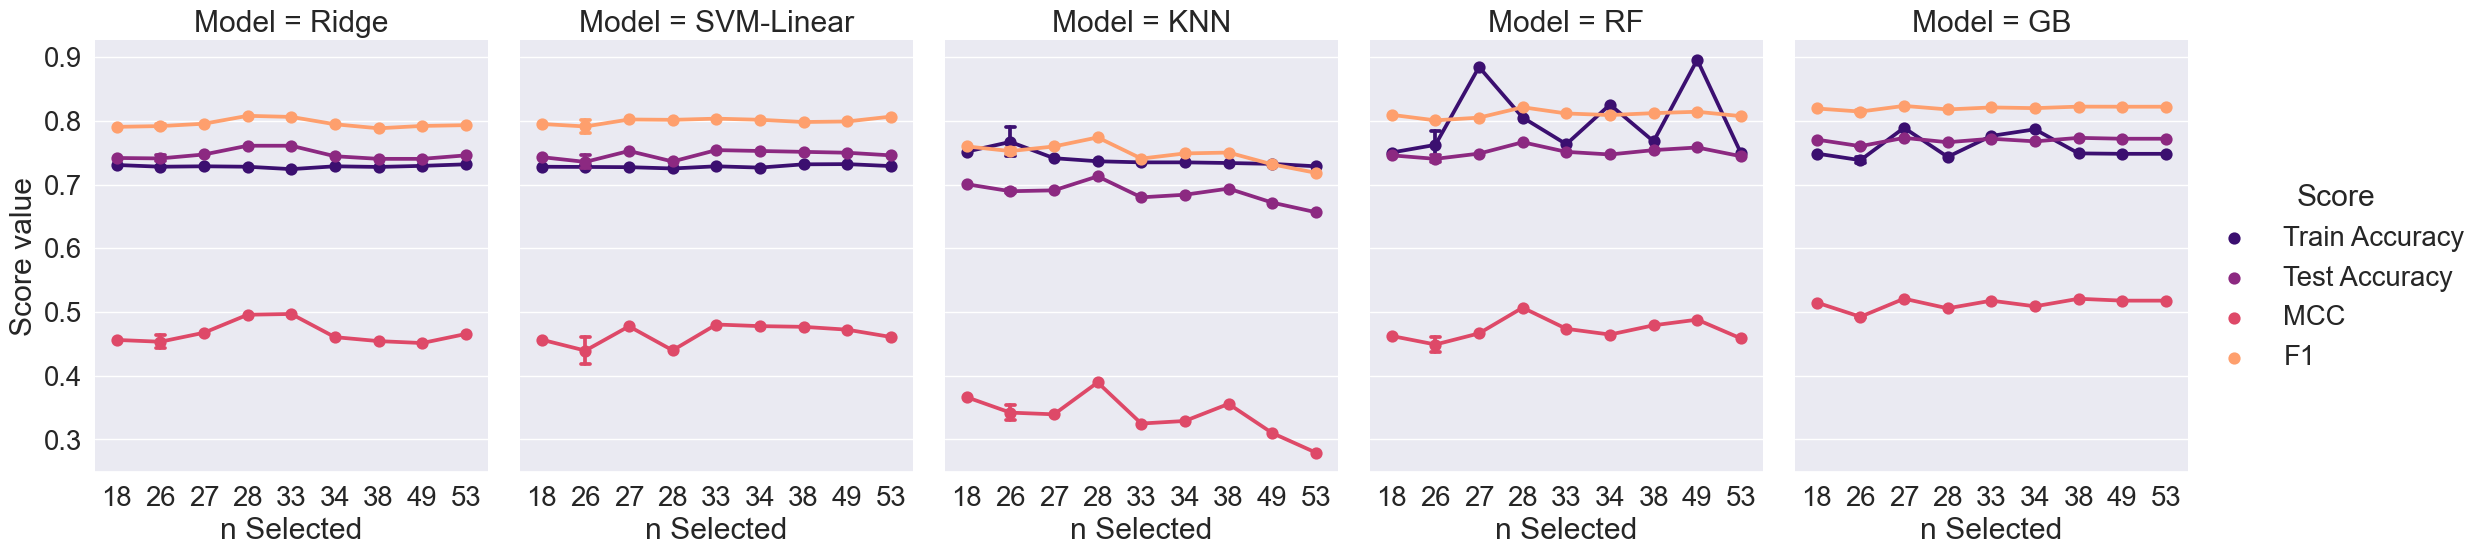

In [23]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_theme(style='whitegrid')
sns.set(font_scale=1.8)

g = sns.catplot(x="n Selected", y="Score value", hue="Score", col="Model",
                capsize=.2, palette="magma", height=6, aspect=.75,
                kind="point", data=results2)
g.despine(left=True)
plt.show()

In [24]:
best_train=results.groupby(['Model'], as_index=False).agg({'Train Accuracy': 'max'})
best_test=results.groupby(['Model'], as_index=False).agg({'Test Accuracy': 'max'})

max_test=[]
for m, a in best_test.values:
    max_test.append(results.loc[(results['Model']==m) & (results['Test Accuracy']==a) , results.columns].index.values[0])

max_train=[]
for m, a in best_train.values:
    max_train.append(results.loc[(results['Model']==m) & (results['Train Accuracy']==a) , results.columns].index.values[0])

**Confusion Matrix**

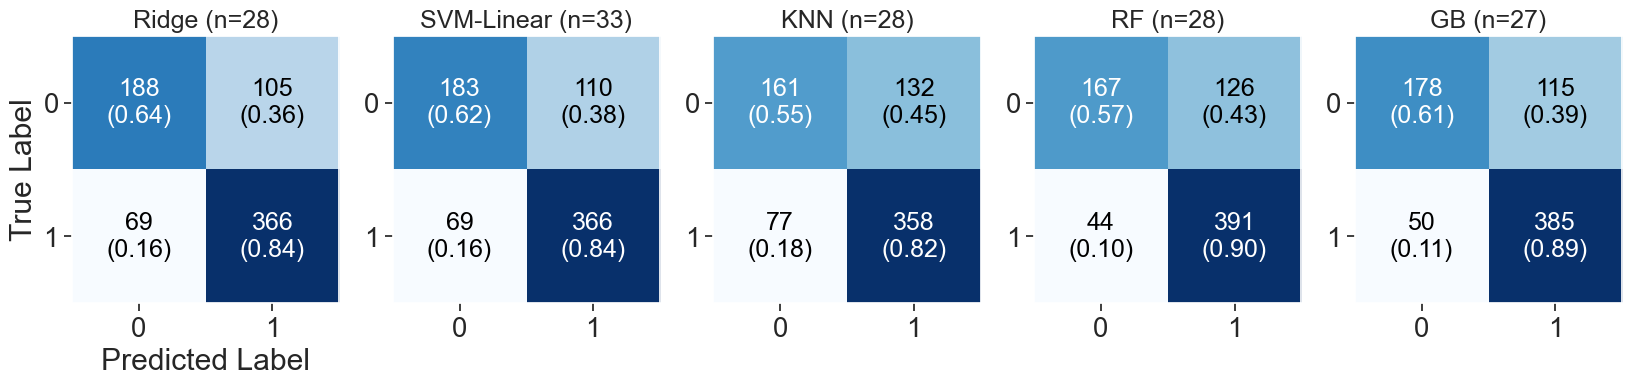

In [25]:
from mlxtend.plotting import plot_confusion_matrix
    
fig, axes=plt.subplots(1,len(max_test), figsize=(20,10))
sns.set(font_scale=1.5)

for idx, i in zip(sorted(max_test), range(len(max_test))):
    plot_confusion_matrix(axis=axes[i], conf_mat=results.loc[idx, 'conf_mat'], show_absolute=True, 
                                  show_normed=True)
    title='{} (n={:0.0f})'.format(results.loc[idx, 'Model'], results.loc[idx, 'n Selected'])
    axes[i].set(title=title)
    if (i > 0): axes[i].set(xlabel='', ylabel='')
    else : axes[i].set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

**Precision-Recall Curve**

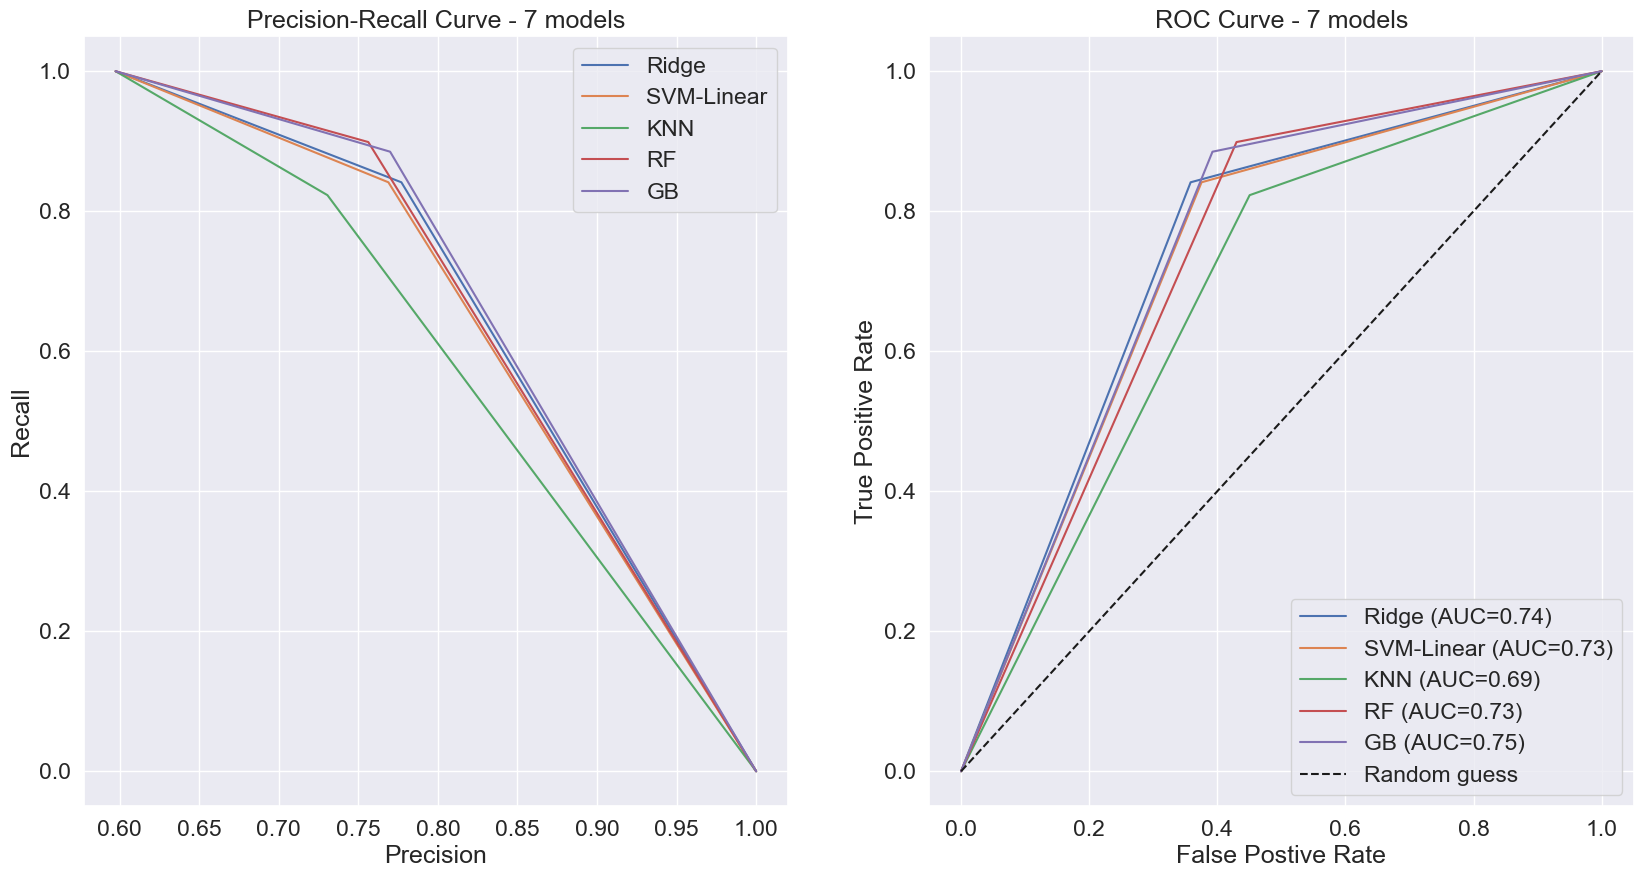

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

fig, axes=plt.subplots(1,2, figsize=(20,10))

for idx in sorted(max_test):
    prec, rec, thr = precision_recall_curve(y_test, results.loc[idx, 'Prediction'])
    axes[0].plot(prec, rec, label=results.loc[idx, 'Model'])
axes[0].set(title='Precision-Recall Curve - 7 models', xlabel='Precision', ylabel='Recall')
axes[0].legend(loc="best")

for idx in sorted(max_test):
    fpr, tpr, thr = roc_curve(y_test, results.loc[idx, 'Prediction'])
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=results.loc[idx, 'Model']+' (AUC={:0.2f})'.format(roc_auc))
axes[1].plot([0, 1], [0, 1], 'k--', label='Random guess')
axes[1].set(title='ROC Curve - 7 models', xlabel='False Postive Rate', ylabel='True Positive Rate')
axes[1].legend(loc="best")

plt.show()

**Details on GB**

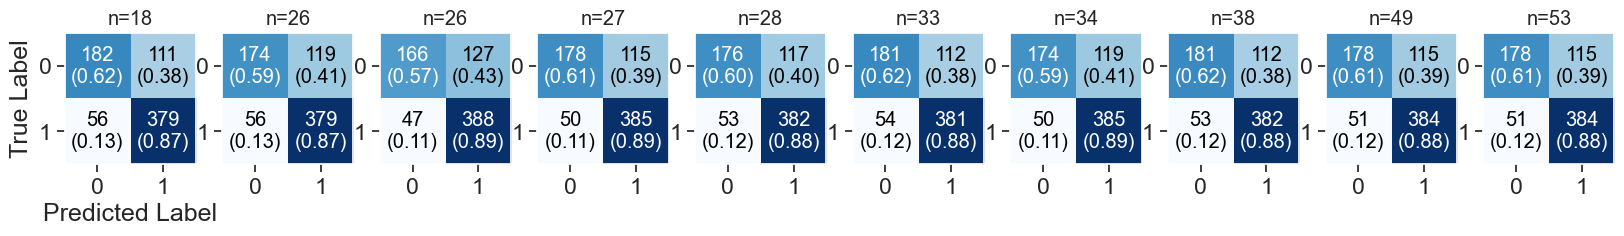

In [27]:
indices=results[results['Model']=='GB'].sort_values(by='n Selected').index
fig, axes=plt.subplots(1,len(indices), figsize=(20,10))
sns.set(font_scale=1.2)

for idx, i in zip(indices, range(len(indices))):
    fig, ax=plot_confusion_matrix(axis=axes[i], conf_mat=results.loc[idx, 'conf_mat'], show_absolute=True, 
                                  show_normed=True)
    ax.set(title='n='+str(results.loc[idx, 'n Selected']))
    if (i > 0): ax.set(xlabel='', ylabel='')
    else : ax.set(xlabel='Predicted Label', ylabel='True Label')

plt.show()

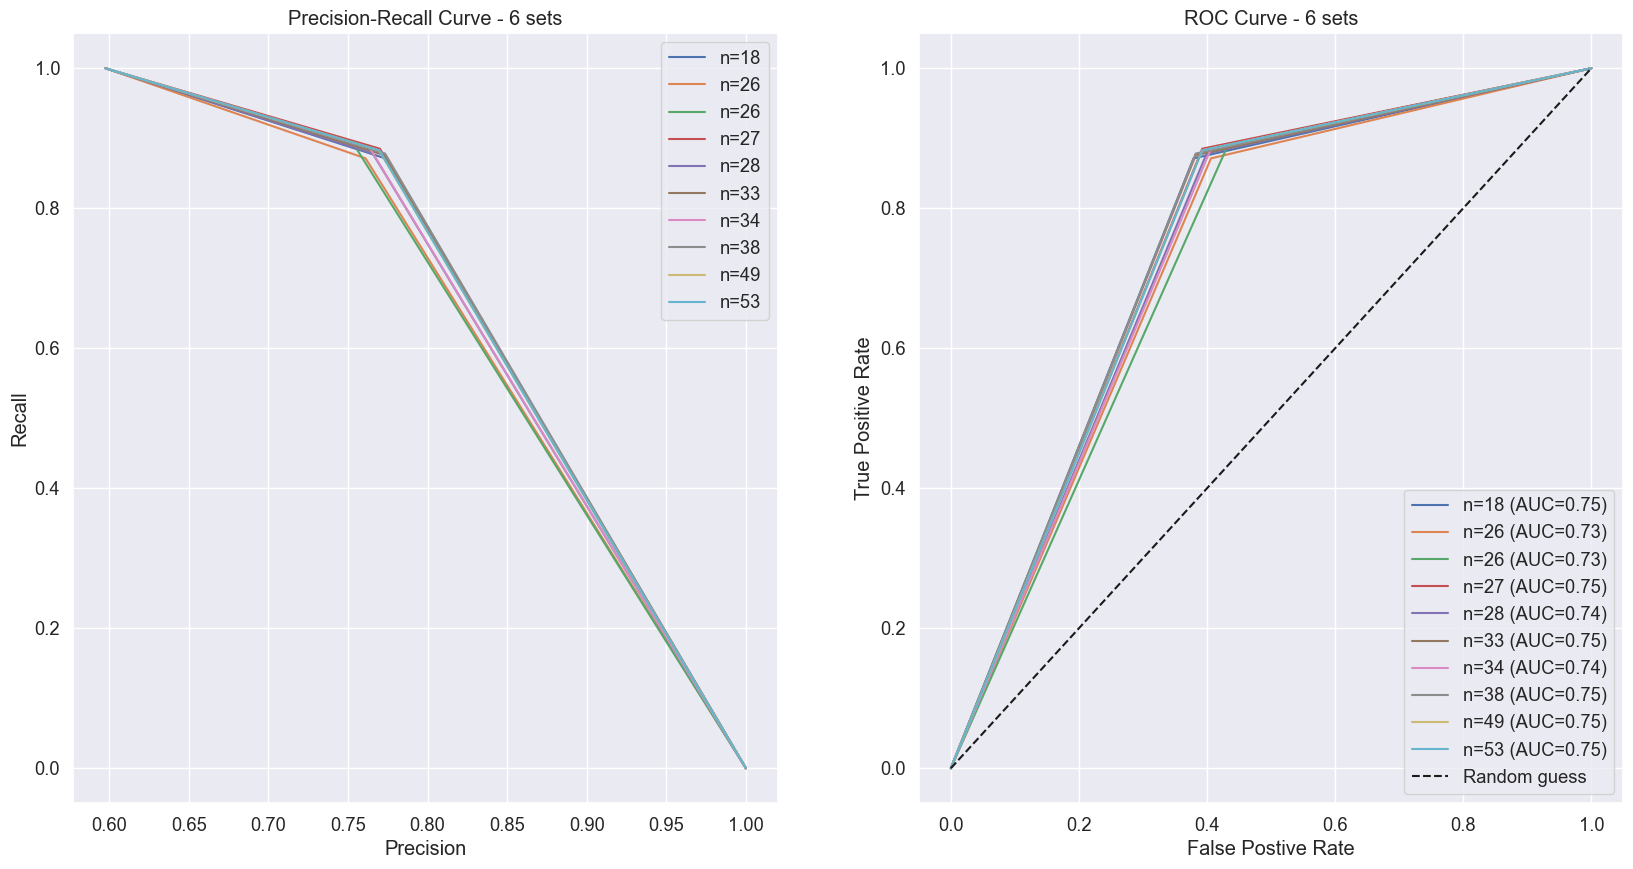

In [28]:
fig, axes=plt.subplots(1,2, figsize=(20,10))

for idx in indices:
    prec, rec, thr = precision_recall_curve(y_test, results.loc[idx, 'Prediction'])
    axes[0].plot(prec, rec, label='n='+str(results.loc[idx, 'n Selected']))
axes[0].set(title='Precision-Recall Curve - 6 sets', xlabel='Precision', ylabel='Recall')
axes[0].legend(loc="best")

for idx in indices:
    fpr, tpr, thr = roc_curve(y_test, results.loc[idx, 'Prediction'])
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label='n='+str(results.loc[idx, 'n Selected'])+' (AUC={:0.2f})'.format(roc_auc))
axes[1].plot([0, 1], [0, 1], 'k--', label='Random guess')
axes[1].set(title='ROC Curve - 6 sets', xlabel='False Postive Rate', ylabel='True Positive Rate')
axes[1].legend(loc="best")

plt.show()

In [29]:
results.loc[max_test]

,Model,estimator,best_params,Method,n Selected,Best Accuracy,Train Accuracy,Test Accuracy,Precision,Recall,F1,MCC,conf_mat,Prediction
43,GB,"([DecisionTreeRegressor(ccp_alpha=0, criterion...","{'ccp_alpha': 0, 'learning_rate': 0.1, 'max_de...",Feature Importance - Random Forest,27,0.743814,0.789148,0.773352,0.770000,0.885057,0.823529,0.520823,"[[178, 115], [50, 385]]","[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ..."
24,KNN,"KNeighborsClassifier(n_jobs=-1, n_neighbors=11)",{'n_neighbors': 11},Permutation Importance - Random Forest,28,0.681317,0.736607,0.712912,0.730612,0.822989,0.774054,0.389395,"[[161, 132], [77, 358]]","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ..."
34,RF,"(DecisionTreeClassifier(ccp_alpha=0.001, crite...","{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",Permutation Importance - Random Forest,28,0.731459,0.805288,0.766484,0.756286,0.898851,0.821429,0.506751,"[[167, 126], [44, 391]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ..."
4,Ridge,"LogisticRegression(C=0.01, max_iter=10000, n_j...","{'C': 0.01, 'solver': 'newton-cg'}",Permutation Importance - Random Forest,28,0.723204,0.728022,0.760989,0.777070,0.841379,0.807947,0.495638,"[[188, 105], [69, 366]]","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, ..."
15,SVM-Linear,"SVC(C=0.1, kernel='linear', random_state=123)","{'C': 0.1, 'kernel': 'linear'}",Permutation Importance - Ridge,33,0.721154,0.728709,0.754121,0.768908,0.841379,0.803513,0.480304,"[[183, 110], [69, 366]]","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ..."


In [30]:
results.sort_values(by=['Test Accuracy', 'MCC'], ascending=False).head(10)

,Model,estimator,best_params,Method,n Selected,Best Accuracy,Train Accuracy,Test Accuracy,Precision,Recall,F1,MCC,conf_mat,Prediction
43,GB,"([DecisionTreeRegressor(ccp_alpha=0, criterion...","{'ccp_alpha': 0, 'learning_rate': 0.1, 'max_de...",Feature Importance - Random Forest,27,0.743814,0.789148,0.773352,0.770000,0.885057,0.823529,0.520823,"[[178, 115], [50, 385]]","[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ..."
47,GB,"([DecisionTreeRegressor(ccp_alpha=0, criterion...","{'ccp_alpha': 0, 'learning_rate': 0.3, 'max_de...",Regularization - Lasso,38,0.741754,0.748970,0.773352,0.773279,0.878161,0.822390,0.520725,"[[181, 112], [53, 382]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ..."
48,GB,"([DecisionTreeRegressor(ccp_alpha=0, criterion...","{'ccp_alpha': 0, 'learning_rate': 0.3, 'max_de...",RFE - Random Forest,49,0.741409,0.748283,0.771978,0.769539,0.882759,0.822270,0.517778,"[[178, 115], [51, 384]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ..."
49,GB,"([DecisionTreeRegressor(ccp_alpha=0, criterion...","{'ccp_alpha': 0, 'learning_rate': 0.3, 'max_de...",No Reduction,53,0.741409,0.748283,0.771978,0.769539,0.882759,0.822270,0.517778,"[[178, 115], [51, 384]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ..."
45,GB,"([DecisionTreeRegressor(ccp_alpha=0, criterion...","{'ccp_alpha': 0, 'learning_rate': 0.1, 'max_de...",Permutation Importance - Ridge,33,0.739009,0.776442,0.771978,0.772819,0.875862,0.821121,0.517731,"[[181, 112], [54, 381]]","[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ..."
40,GB,"([DecisionTreeRegressor(ccp_alpha=0, criterion...","{'ccp_alpha': 0, 'learning_rate': 0.2, 'max_de...",RFE - Ridge,18,0.743130,0.748626,0.770604,0.773469,0.871264,0.819459,0.514792,"[[182, 111], [56, 379]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ..."
46,GB,"([DecisionTreeRegressor(ccp_alpha=0, criterion...","{'ccp_alpha': 0, 'learning_rate': 0.1, 'max_de...",Variance Threshold,34,0.743467,0.786745,0.767857,0.763889,0.885057,0.820021,0.508858,"[[174, 119], [50, 385]]","[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ..."
34,RF,"(DecisionTreeClassifier(ccp_alpha=0.001, crite...","{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",Permutation Importance - Random Forest,28,0.731459,0.805288,0.766484,0.756286,0.898851,0.821429,0.506751,"[[167, 126], [44, 391]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ..."
44,GB,"([DecisionTreeRegressor(ccp_alpha=0, criterion...","{'ccp_alpha': 0, 'learning_rate': 0.2, 'max_de...",Permutation Importance - Random Forest,28,0.742102,0.743475,0.766484,0.765531,0.878161,0.817987,0.505713,"[[176, 117], [53, 382]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ..."
5,Ridge,"LogisticRegression(C=0.01, max_iter=10000, n_j...","{'C': 0.01, 'solver': 'liblinear'}",Permutation Importance - Ridge,33,0.718739,0.724245,0.760989,0.781857,0.832184,0.806236,0.496840,"[[192, 101], [73, 362]]","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, ..."


In [32]:
results.to_csv('Modeling_BL.csv')